<a href="https://colab.research.google.com/github/Maternowsky/Maternowsky/blob/main/PLTR_Trading_Strategy_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for trading/investment strategy**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

# **Load Data**

In [2]:
from google.colab import files
files.upload()

Saving PLTR.csv to PLTR.csv


{'PLTR.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2021-01-04,23.910000,24.500000,22.500000,23.370001,23.370001,44970400\n2021-01-05,23.180000,24.670000,22.889999,24.600000,24.600000,29050400\n2021-01-06,24.120001,24.459999,23.250000,23.540001,23.540001,32732900\n2021-01-07,24.020000,25.190001,23.670000,25.000000,25.000000,32240000\n2021-01-08,25.700001,26.440001,24.700001,25.200001,25.200001,41313800\n2021-01-11,24.610001,26.600000,24.309999,25.930000,25.930000,32609000\n2021-01-12,26.340000,26.420000,25.510000,26.180000,26.180000,26887200\n2021-01-13,25.709999,27.430000,25.129999,25.500000,25.500000,51216600\n2021-01-14,25.450001,25.620001,24.370001,24.920000,24.920000,32908000\n2021-01-15,26.260000,28.000000,25.459999,25.639999,25.639999,92285500\n2021-01-19,26.809999,27.540001,26.000000,26.620001,26.620001,48675800\n2021-01-20,27.290001,27.299999,25.700001,26.340000,26.340000,37459000\n2021-01-21,26.420000,26.680000,25.299999,25.980000,25.980000,29891400\n2021-01-22,25.85000

In [3]:
df = pd.read_csv('PLTR.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,23.910000,24.500000,22.500000,23.370001,23.370001,44970400
1,2021-01-05,23.180000,24.670000,22.889999,24.600000,24.600000,29050400
2,2021-01-06,24.120001,24.459999,23.250000,23.540001,23.540001,32732900
3,2021-01-07,24.020000,25.190001,23.670000,25.000000,25.000000,32240000
4,2021-01-08,25.700001,26.440001,24.700001,25.200001,25.200001,41313800
...,...,...,...,...,...,...,...
583,2023-04-28,7.770000,8.000000,7.620000,7.750000,7.750000,24924400
584,2023-05-01,7.750000,7.820000,7.660000,7.780000,7.780000,19134200
585,2023-05-02,7.720000,7.910000,7.430000,7.590000,7.590000,38008000
586,2023-05-03,7.620000,7.680000,7.450000,7.560000,7.560000,24322400


# **Data Preparation**

In [4]:
#set the date column as index
df.index = pd.to_datetime(df['Date'])

#Drop the date column
df = df.drop(['Date'], axis = 'columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,23.910000,24.500000,22.500000,23.370001,23.370001,44970400
2021-01-05,23.180000,24.670000,22.889999,24.600000,24.600000,29050400
2021-01-06,24.120001,24.459999,23.250000,23.540001,23.540001,32732900
2021-01-07,24.020000,25.190001,23.670000,25.000000,25.000000,32240000
2021-01-08,25.700001,26.440001,24.700001,25.200001,25.200001,41313800
...,...,...,...,...,...,...
2023-04-28,7.770000,8.000000,7.620000,7.750000,7.750000,24924400
2023-05-01,7.750000,7.820000,7.660000,7.780000,7.780000,19134200
2023-05-02,7.720000,7.910000,7.430000,7.590000,7.590000,38008000


## **Data separation as x and y **

In [5]:
#Create the independent variables
df['High-Low']= df['High'] - df['Low']
df['Open-Close'] = df ['Open'] - df['Close']

In [10]:
# Store the independent variables in a variable called 'x'
x = df[['Open-Close', 'High-Low', 'Close']]

# Show first 5 rows of data

x.head()
       

,Open-Close,High-Low,Close
Date,,,
2021-01-04,0.539999,2.000000,23.370001
2021-01-05,-1.420000,1.780001,24.600000
2021-01-06,0.580000,1.209999,23.540001
2021-01-07,-0.980000,1.520001,25.000000
2021-01-08,0.500000,1.740000,25.200001


In [13]:
# Store the target variable into a variable called 'y'

# If tomorrows close price is greater than todays close price then put 1 else 
# put 0

y = np.where(df.Close.shift(-1) > df.Close, 1, 0)
y

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,

## **Data Splitting**

In [14]:
# get the percentage to split the data (90% train data set, and 10% test data set)

percentage_split = 0.9
row = int(df.shape[0] * percentage_split)

#create the train data set
x_train = x[:row]
y_train = y[:row]

#create the test data set
x_test = x[row:]
y_test = y[row:]



# **Model Building**

## **Train the model**

In [18]:
#import the library for machine learning model called Support Vector Classifier (SVC)
from sklearn.svm import SVC
 
 #create the model
model = SVC()

#train the model

model.fit(x_train[['Open-Close', 'High-Low']], y_train)



SVC()

In [19]:
#Check the score of the model on the train data set
model.score(x_train[['Open-Close', 'High-Low']], y_train)

0.55765595463138

In [20]:
# Check the score of the model on the test data set
model.score(x_test[['Open-Close','High-Low']], y_test)

0.423728813559322

In [21]:
#make and show the models predictions
df['Predictions'] = model.predict(x[['Open-Close','High-Low']])

#show the predictions

df['Predictions']

Date
2021-01-04    1
2021-01-05    0
2021-01-06    0
2021-01-07    0
2021-01-08    1
             ..
2023-04-28    1
2023-05-01    1
2023-05-02    1
2023-05-03    1
2023-05-04    1
Name: Predictions, Length: 588, dtype: int64

## **Compare the Model**

In [23]:
#Calculate the daily returns

df['Return'] = df['Close'].pct_change(1)

In [24]:
#calculate the strategy returns

df['Strat_Return'] = df['Predictions'].shift(1) * df['Return']

#show the strategy returns

df['Strat_Return']

Date
2021-01-04         NaN
2021-01-05    0.052632
2021-01-06   -0.000000
2021-01-07    0.000000
2021-01-08    0.000000
                ...   
2023-04-28   -0.008951
2023-05-01    0.003871
2023-05-02   -0.024422
2023-05-03   -0.003953
2023-05-04   -0.023810
Name: Strat_Return, Length: 588, dtype: float64

In [25]:
#Calculate the Cumulative returns

df['Cumul_Ret'] = df['Return'].cumsum()

#Calculation of the strategy cumulative returns

df['Cumul_Strategy'] = df['Strat_Return'].cumsum()

# **Visualize the Data**

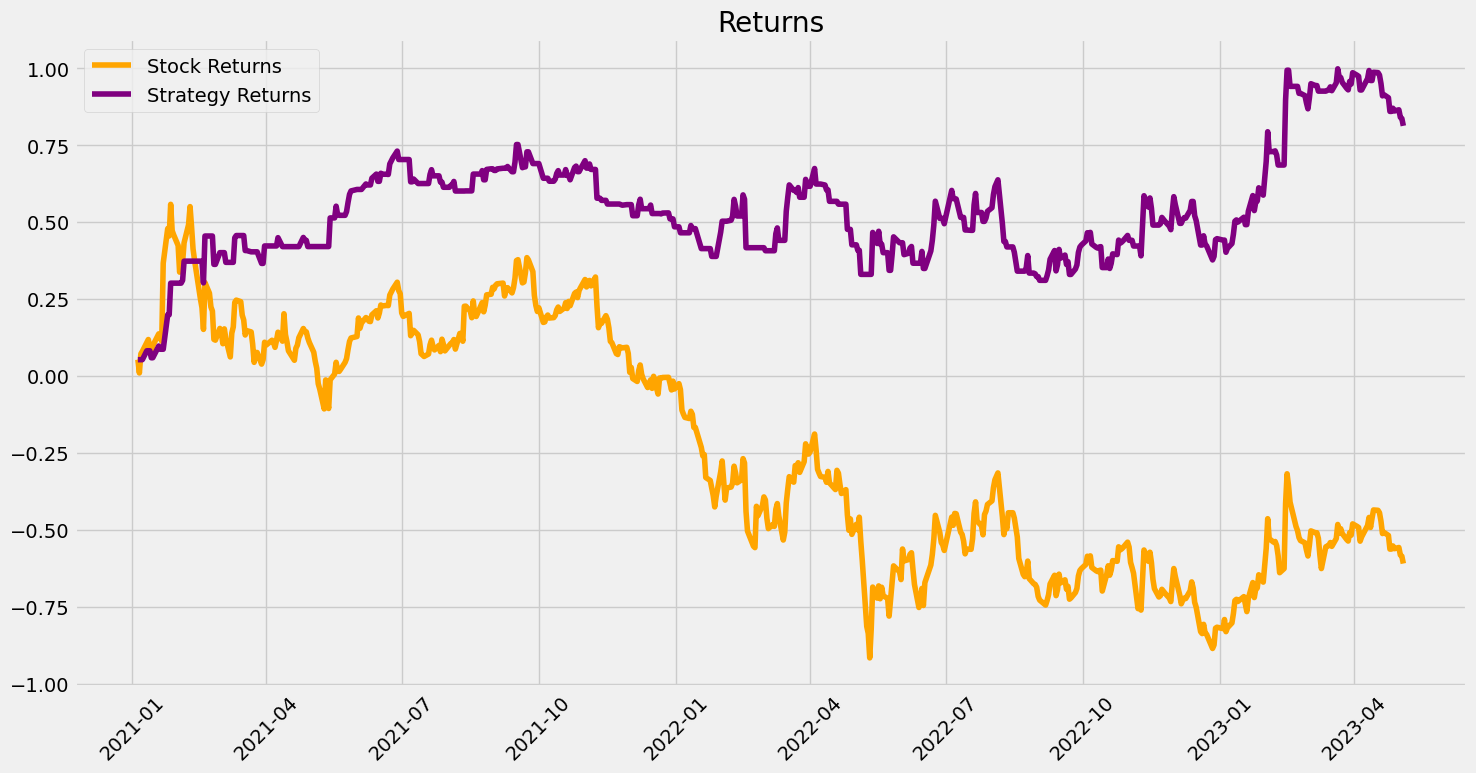

In [27]:
#visualize and show the data
plt.figure(figsize = (16,8))
plt.title('Returns')
plt.plot(df['Cumul_Ret'], color = 'orange', label = 'Stock Returns')
plt.plot(df['Cumul_Strategy'], color = 'purple', label = 'Strategy Returns')
plt.xticks( rotation = 45)
plt.legend()
plt.show()

In [28]:
#Print the Returns
print('Holding the stock gives a return of', df['Cumul_Ret'][-1] * 100, '%')
print('The strategy gives a return of', df['Cumul_Strategy'][-1] * 100, '%')

The stock gives a return of -60.97004674641051 %
The strategy gives a return of 81.22946262159843 %
